# Project 2020 - Fundamentals of Data Analysis

---

### Project requirements:

Perform and explain simple linear regression using Python on the **powerproduction** dataset.
The goal is to;
- accurately predict wind turbine power output from wind speed values using the data set as a basis.
 1. using simple linear regression on the data set.
 2. In that notebook, an explanation of your regression and an analysis of its accuracy.

#### Methodology:

* Importing the data set
* Explore the data set
* Perform Analysis


To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

In [1]:
# Getting plotts inline

%matplotlib inline

# importing required packages and libraries
# numerical library
import numpy as np
rng = np.random.default_rng()
# data frames
import pandas as pd
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)
# Nicer colours and styles for plots.
# plt.style.use("ggplot")
plt.style.use("fivethirtyeight")

In [2]:
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df = pd.read_csv(url, error_bad_lines=False)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


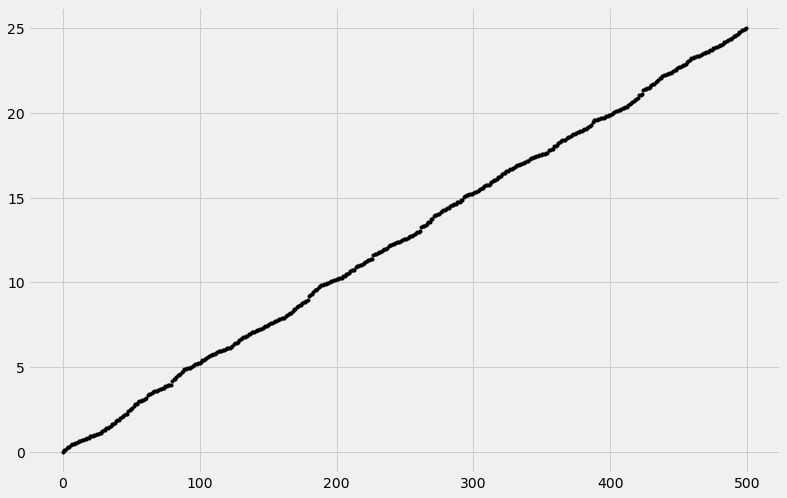

In [3]:
plt.plot(df["speed"], "k.")

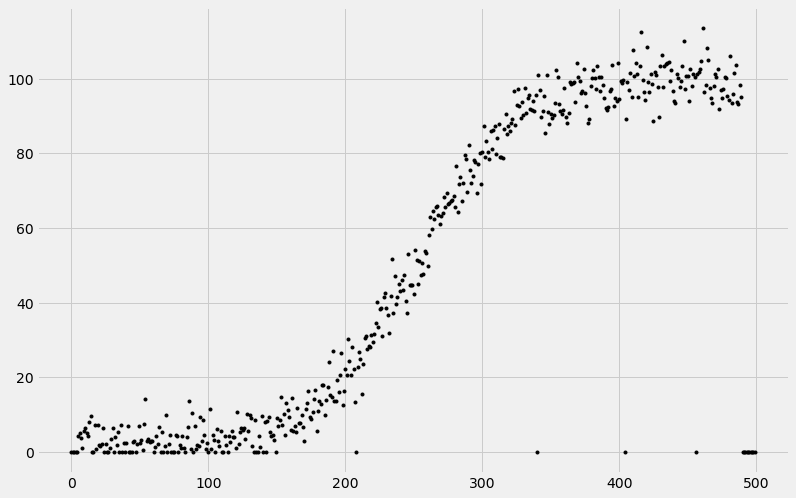

<function matplotlib.pyplot.clf()>

In [4]:
plt.plot(df["power"], "k.")
plt.show()
plt.clf

In [5]:
# transpose the data set
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [6]:
# validating the data set
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<AxesSubplot:xlabel='speed', ylabel='power'>

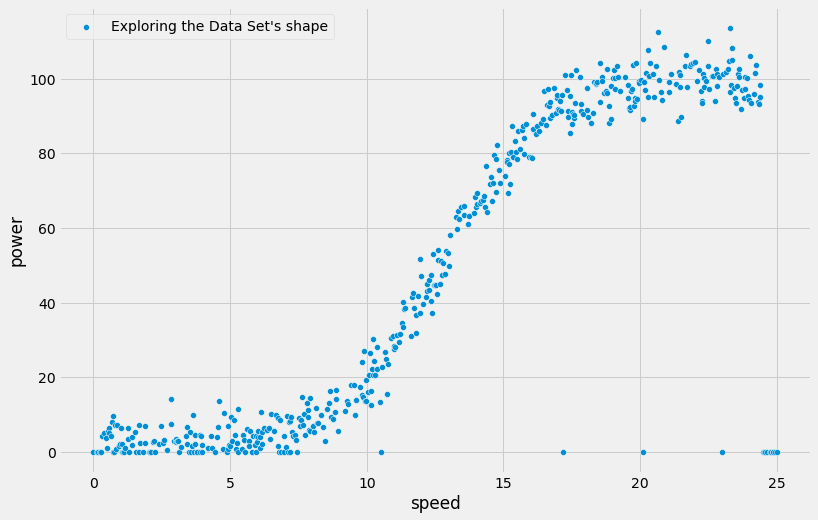

In [7]:
sns.scatterplot(data = df, x = "speed", y = "power", label = "Exploring the Data Set's shape")

<br>

---
## Simple Linear Regression using _`Numpy`_
---

In [8]:
# Do regression on the speed and power arrays using numpy.
np.polyfit(df["speed"], df["power"], 1)

array([  4.91759567, -13.89990263])

In [9]:
speed = df["speed"]
power = df["power"]

# Create variables with those values.
m, p = np.polyfit(speed, power, 1)

# Have a look at m and r.
m, p

(4.917595665404671, -13.89990263051961)

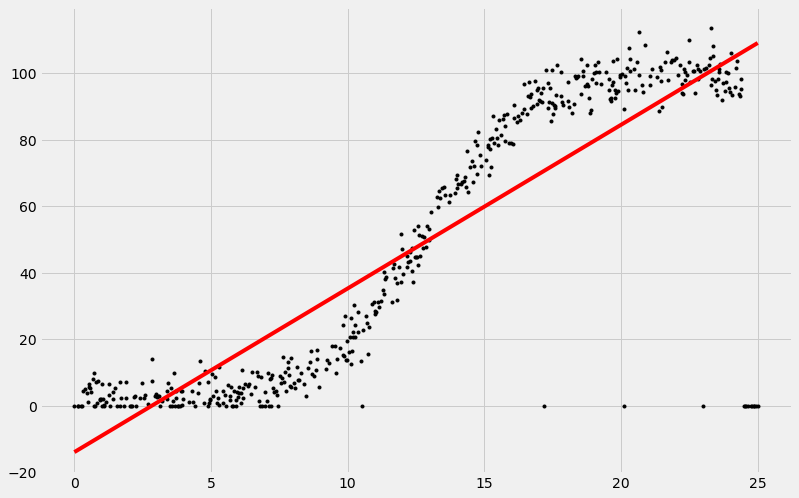

In [10]:
# Plot speed and power and the regression line in red.
plt.plot(speed, power, "k.")
plt.plot(speed, m * speed + p, "r-" )


### Calculating the best `m` and `r` 

In [11]:
# Calculate mean speed and mean power.
speed_avg = np.mean(speed)
power_avg = np.mean(power)

# Subtract means from speed and power.
speed_zero = speed - speed_avg
power_zero = power - power_avg

# Dot product of mean-adjusted speed and power divided by dot product of mean adjusted speed with itself.
m = np.sum(speed_zero * power_zero) / np.sum(speed_zero * speed_zero)

# Subtract m times average x from average y.
p = power_avg - m * speed_avg

# Let's have a look - same values as above.
m, p

(4.917595665404668, -13.899902630519541)

<AxesSubplot:xlabel='speed', ylabel='power'>

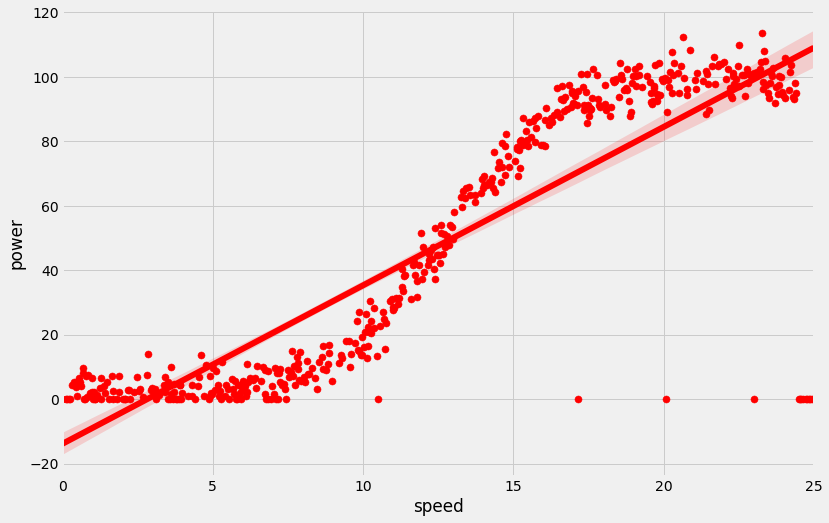

In [12]:
# simple linear regression by using seaborn [1]
sns.regplot(x = "speed", y = "power", data = df, x_estimator=np.mean, color = "r")


<br>

---

## Simple Linear Regression Using  _`Scikit-learn`_
---

In [13]:
def f(x, p):
    return p[0] + x * p[1]

#### Train


In [15]:
# using linear_model : https://scikit-learn.org/stable/modules/linear_model.html 
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb 
# pda : Notebook: Models

import sklearn.linear_model as lim
from sklearn.linear_model import LinearRegression

speed = df["speed"].to_numpy()
power = df["power"].to_numpy()

speed = speed.reshape(-1, 1)

# Create a linear regression model instance.
m = lim.LinearRegression()

# Ask the model to fit the data.
m.fit(speed, power)

LinearRegression()

In [16]:
# Here's our intercept.
m.intercept_

-13.899902630519641

In [17]:
# The coefficients.
m.coef_

array([4.91759567])

In [18]:
# See how good the fit is.
m.score(speed, power)

0.7289360258564072

In [19]:
# training model
p = [m.intercept_, m.coef_[0]]
p

[-13.899902630519641, 4.91759566540467]

#### predict


In [20]:
# linear regression function

def predict(speed):
    """
    predicting the power using speed as input
    
    """
    return f(speed, p)

In [21]:
# f(x, p)

In [22]:
power = predict(speed)

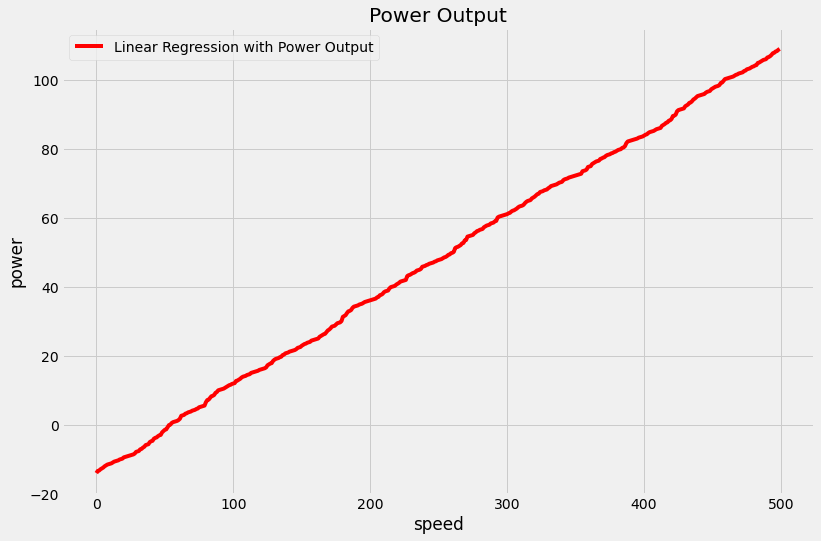

In [23]:
plt.plot(power, "r-", label = "Linear Regression with Power Output")
plt.title("Power Output")
plt.xlabel("speed")
plt.ylabel("power")
plt.legend()

<br>

### Advanced _`Scikit-Learn`_

In [24]:
# importing scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

In [25]:
# retrieve the array
data = df.values
# split into input and output elements
speed, power = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(speed.shape, power.shape)

(500, 1) (500,)


*We can see from the above, the data set was loaded correctly and there are **500 rows** of data with **1 input variable** and **a single target variable**.*


In [26]:
# split into train and test sets
speed_train, speed_test, power_train, power_test = train_test_split(speed, power, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(speed_train.shape, speed_test.shape, power_train.shape, power_test.shape)

(335, 1) (165, 1) (335,) (165,)


_The data set is split into **train** and **test** sets, with **335** rows used for **model training** and **165** for **model evaluation**._

### _Automatic Outlier Detection_

The scikit-learn library provides a number of built-in automatic methods for identifying outliers in data. Each method will be defined, then fit on the training dataset. The fit model will then predict which examples in the training dataset are outliers and which are not (so-called inliers). The outliers will then be removed from the training dataset, then the model will be fit on the remaining examples and evaluated on the entire test dataset.

It would be invalid to fit the outlier detection method on the entire training dataset as this would result in data leakage. That is, the model would have access to data (or information about the data) in the test set not used to train the model. This may result in an optimistic estimate of model performance.

One approach might be to return a “None” indicating that the model is unable to make a prediction on those outlier cases. This might be an interesting extension to explore that may be appropriate for your project [3].


#### _Isolation Forest_

Isolation Forest, or iForest for short, is a tree-based anomaly detection algorithm.

It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space. The scikit-learn library provides an implementation of Isolation Forest in the IsolationForest class.

The most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between `0.0` and `0.5` and by default is set to `0.1` [3].



In [27]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
power_hat = iso.fit_predict(speed_train)

# select all rows that are not outliers
mask = power_hat != -1
speed_train, power_train = speed_train[mask, :], power_train[mask]

# summarize the shape of the updated train and test sets
print(speed_train.shape, speed_test.shape, power_train.shape, power_test.shape)

(301, 1) (165, 1) (301,) (165,)


### _Baseline Model Performance_

It is a regression predictive modeling problem, meaning that we will be predicting a numeric value. All input variables are also numeric.
In this case, we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).



#### Fit

In [28]:
# Fit the model
m = LinearRegression()
m.fit(speed_train, power_train)

LinearRegression()

#### Evaluate

In [29]:
# Evaluate the model
power_hat = m.predict(speed_test)

# Evaluate prediction
mae = mean_absolute_error(power_test, power_hat)
print(" Mean Absolute Error(MAE): %.3f" % mae)

 Mean Absolute Error(MAE): 15.408


The model achieved a **MAE** of **15.860**. This is a baseline in performance to which we can compare different outlier identification and removal procedure. After implementing **Isolation Forest** method, the **MAE** was **15.441**.

In [30]:
# Here's our intercept.
m.intercept_

-23.309331042699448

In [31]:
# The coefficients.
m.coef_

array([5.81270935])

In [32]:
# See how good the fit is.
m.score(speed, power)

0.7027821387762374

In [33]:
# training model
p = [m.intercept_, m.coef_[0]]
p

[-23.309331042699448, 5.812709349229112]

#### Predict

In [34]:
# linear regression function

def predict(speed):
    """
    predicting the power using speed as input
    
    """
    return f(speed, p)

In [35]:
# f(x, p)
power = predict(speed)

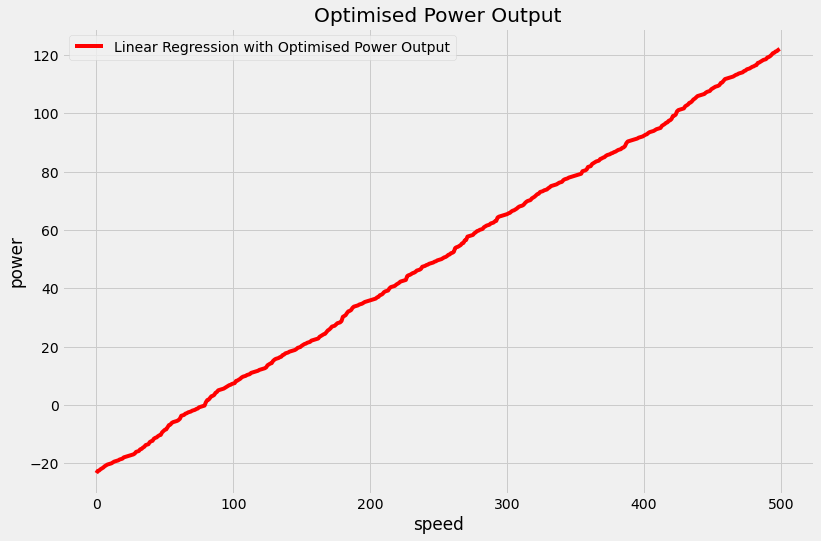

In [36]:
plt.plot(power, "r-", label = "Linear Regression with Optimised Power Output")
plt.title("Optimised Power Output")
plt.xlabel("speed")
plt.ylabel("power")
plt.legend()

<br>

---

##  Simple Linear Regression Using _`Statsmodels`_

---

In [37]:

# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
speedwithp = sm.add_constant(speed)

# Create a model.
msm = sm.OLS(power, speedwithp)
# Fit the data.
psm = msm.fit()
# Print a summary.
print(psm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.225e+33
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:34:42   Log-Likelihood:                 15066.
No. Observations:                 500   AIC:                        -3.013e+04
Df Residuals:                     498   BIC:                        -3.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.3093   1.79e-15   -1.3e+16      0.0

<br>

***

## Polynomial Regression With scikit-learn

***

In [38]:
# Importing Libraries.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [39]:
# Assigning variables.

x = speed.reshape(-1, 1)
y = power

In [71]:
# transformer refers to an instance of PolynomialFeatures which you can use to transform the input x (speed).
transformer = PolynomialFeatures(degree=4, include_bias=False)

In [72]:
# Fitting transformer with x (speed).
transformer.fit(x)

PolynomialFeatures(degree=4, include_bias=False)

In [73]:
# Create a new and modified input.
x_ = transformer.transform(x)

In [83]:
# summarizing the earlier 3 steps with one line of code.
x_ = PolynomialFeatures(degree=4, include_bias=False).fit_transform(x)

In [84]:
# create and fit the model.
m = LinearRegression().fit(x_, y)

In [85]:
# Getting the R-square
r_sq = m.score(x_, y)
print('coefficient of determination:', r_sq)

print('intercept:', m.intercept_)

print('coefficients:', m.coef_)

p = [m.intercept_, m.coef_[0]]

print ('p :', p)

coefficient of determination: 1.0
intercept: [-23.30933104]
coefficients: [[ 5.81270935e+00 -1.92070842e-15  1.00053431e-16 -3.61632920e-18]]
p : [array([-23.30933104]), array([ 5.81270935e+00, -1.92070842e-15,  1.00053431e-16, -3.61632920e-18])]


In [86]:
# Getting very similar results with different transformation arguments.
x_ = PolynomialFeatures(degree=4, include_bias=True).fit_transform(x)

In [87]:
print(x_)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 1.25000000e-01 1.56250000e-02 1.95312500e-03
  2.44140625e-04]
 [1.00000000e+00 1.50000000e-01 2.25000000e-02 3.37500000e-03
  5.06250000e-04]
 ...
 [1.00000000e+00 2.48750000e+01 6.18765625e+02 1.53917949e+04
  3.82870899e+05]
 [1.00000000e+00 2.49500000e+01 6.22502500e+02 1.55314374e+04
  3.87509363e+05]
 [1.00000000e+00 2.50000000e+01 6.25000000e+02 1.56250000e+04
  3.90625000e+05]]


In [88]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [89]:
# Getting similar results to the previous case.
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)


coefficient of determination: 1.0
intercept: 0.0
coefficients: [[-2.33093310e+01  5.81270935e+00 -1.29561292e-13 -2.26485497e-14
   0.00000000e+00]]


In [90]:
# predict the response (power)
y_pred = model.predict(x_)
print('predicted response:', y_pred)

predicted response: [[-23.30933104]
 [-22.58274237]
 [-22.43742464]
 [-22.00147144]
 [-21.71083597]
 [-21.4202005 ]
 [-20.9842473 ]
 [-20.69361184]
 [-20.39716366]
 [-20.25184593]
 [-20.10652819]
 [-19.96121046]
 [-19.67057499]
 [-19.37993952]
 [-19.23462179]
 [-19.08930406]
 [-18.94398632]
 [-18.65335085]
 [-18.50803312]
 [-18.36271539]
 [-17.92676219]
 [-17.78144445]
 [-17.63612672]
 [-17.49080898]
 [-17.34549125]
 [-17.20017352]
 [-17.05485578]
 [-16.90953805]
 [-16.61890258]
 [-16.03763165]
 [-15.89231391]
 [-15.74699618]
 [-15.16572524]
 [-15.02040751]
 [-14.5786416 ]
 [-14.28800613]
 [-13.7067352 ]
 [-13.56141746]
 [-13.41609973]
 [-12.68951106]
 [-12.39887559]
 [-12.25355786]
 [-11.52696919]
 [-11.23633372]
 [-11.09101599]
 [-10.65506279]
 [-10.36442732]
 [-10.21910959]
 [ -9.34720319]
 [ -8.91124998]
 [ -8.46948407]
 [ -8.32416634]
 [ -7.59757767]
 [ -6.870989  ]
 [ -6.72567127]
 [ -6.14440033]
 [ -5.85376487]
 [ -5.70844713]
 [ -5.5631294 ]
 [ -5.41781167]
 [ -5.1271762 ]
 [ -

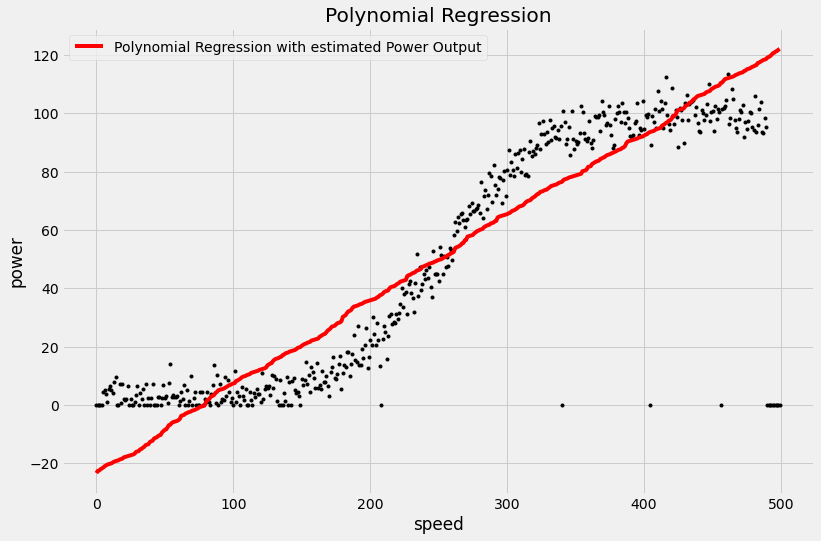

In [91]:
plt.plot(df["power"], "k.",)
plt.plot(y_pred, "r-", label = "Polynomial Regression with estimated Power Output")
plt.title("Polynomial Regression")
plt.xlabel("speed")
plt.ylabel("power")
plt.legend()

## References

[1] Functions to draw linear regression models ; https://seaborn.pydata.org/tutorial/regression.html#functions-to-draw-linear-regression-models

[2] Ian McLoughlin; Models : https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb

[3] 4 Automatic Outlier Detection Algorithms in Python : https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

[4] Matplotlib : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

[5] KDnuggets : https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html

[6] RealPython ; Linear Regression in Python : https://realpython.com/linear-regression-in-python/

[7] Statistics By Jim : https://statisticsbyjim.com/regression/choosing-regression-analysis/

[8] Wikipedia ; polynomial regression: https://en.wikipedia.org/wiki/Polynomial_regression

## End